## Introduction

This notebook will be used mainly for Data Science Capstone Project. 


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Printing the Statement

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Introduction

Road accidents can occur to anyone anytime anywhere.  Fortunately, data on road accidents are continuously collected and are made available to everyone.  We want to understand and maximize on the value of the available data in order to help us prevent road accidents – that when given information on location and other external conditions, the possibility and severity of an accident can be predicted and prevented thereby assisting local government units in publishing this information to travelers along their local areas.

## Data
The city of Seattle has a dataset on all collisions collected since 2004 to present, as provided by the Seattle Police District and recorded by Traffic Records.  It has 194,673 observations with 37 attributes.   It has been downloaded as a csv file – DataCollisions.csv from this link: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

The description of the attributes are given below:

| Attribute | Data Type | Data Length | Description |
| :------------- | :-------------: | :----------------: | :--------------- |
|ADDRTYPE|Text|12|Collision address type: Alley, Block, Intersection|
|COLDETKEY|Long| |Secondary key for the incident.|
|COLLISIONTYPE|Text|300|Collision type.|
|CROSSWALKKEY|Long| |A key for the crosswalk at which the collision occurred.|
|EXCEPTRSNCODE|Text|10| |
|EXCEPTRSNDESC|Text|300| |
|FATALITIES|Double| |The number of fatalities in the collision.   This is entered by the state.|
|HITPARKEDCAR|Text|1|Whether or not the collision involved hitting a parked car.  (Y/N)|
|INATTENTIONIND|Text|1|Whether or not collision was due to inattention. (Y/N)|
|INCDATE|Date| |The date of the incident.|
|INCDTTM|Text|30|The date and time of the incident.|
|INCKEY|Long| |A unique key for the incident.|
|INJURIES|Double| |The number of total injuries in the collision.   This is entered by the state.|
|INTKEY|Double| |Key that corresponds to the intersection associated with a collision.|
|JUNCTIONTYPE|Text|300|Category of junction at which collision took place.|
|LIGHTCOND|Text|300|The light conditions during the collision.|
|LOCATION|Text|255|Description of the general location of the collision.|
|OBJECTID|ObjectID| |ESRI unique identifier.|
|PEDCOUNT|Double| |The number of pedestrians involved in the collision. This is entered by the state.|
|PEDCYLCOUNT|Double| |The number of bicycles involved in the collision.  This is entered by the state.|
|PEDROWNOTGRNT|Text|1|Whether or not the pedestrian right of way was not granted. (Y/N)|
|PERSONCOUNT|Double| |The total number of people involved in the collision.|
|ROADCOND|Text|300|The condition of the road during the collision.|
|SDOT_COLCODE|Text|10|A code given to the collision by SDOT.|
|SDOT_COLDESC|Text|300|A description of the collision corresponding to the collision code.|
|SDOTCOLNUM|Text|10|A number given to the collision by SDOT.|
|SEGLANEKEY|Long| |A key for the lane segment in which the collision occurred.|
|SERIOUSINJURIES|Double| |The number of serious injuries in the collision.  This is entered by the state.|
|SEVERITYCODE|Text|100|A code that corresponds to the severity of the collision: [3 – fatality, 2b - serious injury, 2 – injury, 1 – prop, damage, 0 – unknown]|
|SEVERITYDESC|Text| |A detailed description of the severity of the collision.|
|SHAPE|Geometry| |ESRI geometry field.|
|SPEEDING|Text|1|Whether or not speeding was a factor in the collision.  (Y/N)|
|ST_COLCODE|Text|10|A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary.|
|ST_COLDESC|Text|300|A description that corresponds to the state’s coding designation.|
|UNDERINFL|Text|10|Whether or not a driver involved was under the influence of drugs or alcohol.|
|VEHCOUNT|Double| |The number of vehicles involved in the collision. This is entered by the state.|
|WEATHER|Text|300|A description of the weather conditions during the time of the collision.|


SEVERITYCODE will be used as the dependent variable, and several attributes will be useful as independent variables – like collision address type, weather condition, road condition, light condition, date of the incident.  

Let's download the Data Collision file DataCollisions.csv from the given link.

In [3]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-03 13:30:02--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  42.0MB/s   in 1.7s   

2020-10-03 13:30:04 (42.0 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



Load our data from the CSV file.

In [4]:
df1 = pd.read_csv('Data-Collisions.csv')
df1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df1.shape

(194673, 38)

In [6]:
df1.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

## Methodology

We will only keep attributes mentioned in the Data section, which are SEVERITYCODE, ADDRTYPE, WEATHER, ROADCOND, LIGHTCOND, and day of the incident as extracted from INCDATE.

In [7]:
df2 = df1.drop(columns = ['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'JUNCTIONTYPE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM', 
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'])

In [8]:
df2.dtypes

SEVERITYCODE     int64
ADDRTYPE        object
INCDATE         object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

Let's check if there are any NaN values. 

In [9]:
df2.isna().any()

SEVERITYCODE    False
ADDRTYPE         True
INCDATE         False
WEATHER          True
ROADCOND         True
LIGHTCOND        True
dtype: bool

Drop rows which have NaN values so that sklearn can process them.

In [10]:
df2 = df2.dropna()

In [11]:
df2.shape

(187525, 6)

Let's see the breakdown of the different values of ADDRTYPE.

In [12]:
df2["ADDRTYPE"].value_counts().to_frame()

,ADDRTYPE
Block,123321
Intersection,63462
Alley,742


Let's see the breakdown of the different values of WEATHER.

In [13]:
df2["WEATHER"].value_counts().to_frame()

,WEATHER
Clear,110499
Raining,32976
Overcast,27551
Unknown,14059
Snowing,896
Other,790
Fog/Smog/Smoke,563
Sleet/Hail/Freezing Rain,112
Blowing Sand/Dirt,49
Severe Crosswind,25


Let's drop rows with unknown value for WEATHER.

In [14]:
df2 = df2[df2['WEATHER'] != 'Unknown']

Let's see the breakdown of the different values of LIGHTCOND.

In [15]:
df2["LIGHTCOND"].value_counts().to_frame()

,LIGHTCOND
Daylight,112988
Dark - Street Lights On,46937
Dusk,5666
Unknown,2696
Dawn,2428
Dark - No Street Lights,1425
Dark - Street Lights Off,1116
Other,199
Dark - Unknown Lighting,11


Let's drop rows with unknown value for LIGHTCOND.

In [16]:
df2 = df2[df2['LIGHTCOND'] != 'Unknown']

Let's see the breakdown of the different values of ROADCOND.

In [17]:
df2["ROADCOND"].value_counts().to_frame()

,ROADCOND
Dry,121233
Wet,46284
Ice,1088
Unknown,989
Snow/Slush,841
Other,105
Standing Water,104
Sand/Mud/Dirt,65
Oil,61


Let's drop rows with unknown value for ROADCOND.

In [18]:
df2 = df2[df2['ROADCOND'] != 'Unknown']

Let's extract the day of the week when the incident happened from the INCDATE.

In [19]:
import datetime as dt
df2['INCDATE'] = pd.to_datetime(df2['INCDATE'])
df2['WEEKDAYNUM'] = df2['INCDATE'].dt.dayofweek

Let's see how the distribution of the incidents over the different days of the week.

In [20]:
df2["WEEKDAYNUM"].value_counts().to_frame()

,WEEKDAYNUM
4,28269
3,25657
2,25131
1,24892
5,23993
0,22801
6,19038


With some cleansing of our data, our row count is now...

In [21]:
df2.shape

(169781, 7)

Let's transform the target variable SEVERITYCODE in order to balance the data prior to modeling processing.

In [22]:
df2["SEVERITYCODE"].value_counts().to_frame()

,SEVERITYCODE
1,114074
2,55707


In [23]:
from sklearn.utils import resample
df_severity1 = df2[ df2["SEVERITYCODE"] == 1]
df_severity2 = df2[ df2["SEVERITYCODE"] == 2]
df_severity1_downsampled = resample(df_severity1, 
                                   replace=False,
                                   n_samples=55707,  
                                   random_state=123)
df3 = pd.concat([df_severity1_downsampled, df_severity2])

In [24]:
df3.reset_index(drop=True, inplace=True)

In [25]:
df3["SEVERITYCODE"].value_counts().to_frame()

,SEVERITYCODE
2,55707
1,55707


In [26]:
df3.head()

,SEVERITYCODE,ADDRTYPE,INCDATE,WEATHER,ROADCOND,LIGHTCOND,WEEKDAYNUM
0,1,Block,2018-02-01 00:00:00+00:00,Raining,Wet,Daylight,3
1,1,Block,2018-11-15 00:00:00+00:00,Clear,Dry,Daylight,3
2,1,Block,2009-08-17 00:00:00+00:00,Clear,Dry,Daylight,0
3,1,Block,2004-03-05 00:00:00+00:00,Clear,Dry,Daylight,4
4,1,Block,2018-02-26 00:00:00+00:00,Clear,Dry,Daylight,0


Some exploratory data analysis on the independent variables.

There are more Severity Code 1 collisions along Blocks than on Intersections. 
Collisions of Severity Code 2 registered almost the same count on both Blocks and Intersections. 

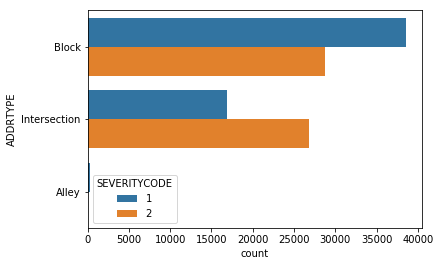

In [27]:
ax = sns.countplot(y="ADDRTYPE", hue="SEVERITYCODE", data=df3)

The most number of collisions happens on Clear Weather.

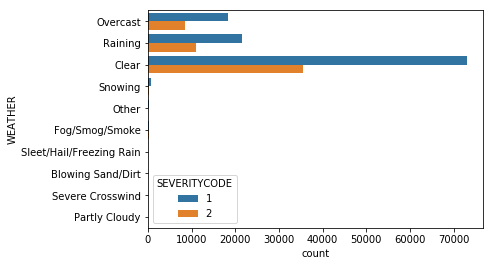

In [28]:
ax = sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df2)

Looking at LIGHTCOND, most of the collisions happen on daylight.

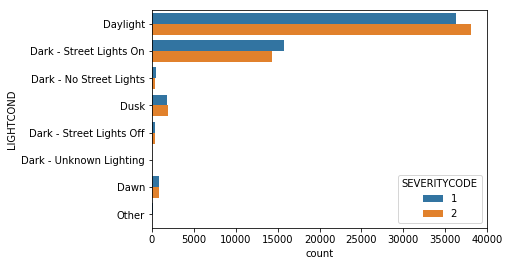

In [29]:
dax = sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df3)

Most of the collisions happen on dry roads.

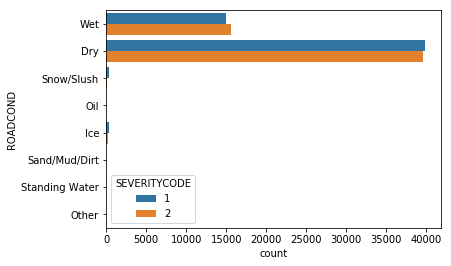

In [30]:
ax = sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df3)

There is less collisions during weekend and surprisingly, there is an upward trend on collisions on weekdays.

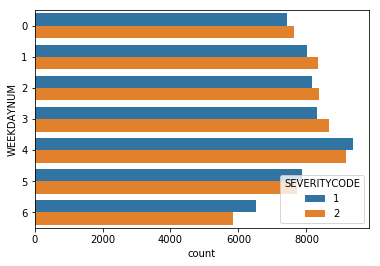

In [31]:
ax = sns.countplot(y="WEEKDAYNUM", hue="SEVERITYCODE", data=df3)

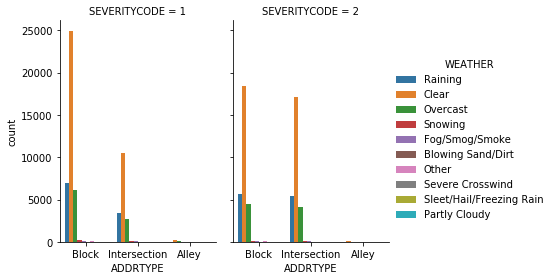

In [32]:
g = sns.catplot(x="ADDRTYPE", hue="WEATHER", col="SEVERITYCODE",
                data=df3, kind="count",
                height=4, aspect=.7);

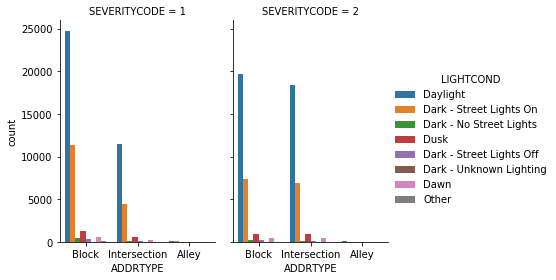

In [33]:
g = sns.catplot(x="ADDRTYPE", hue="LIGHTCOND", col="SEVERITYCODE",
                data=df3, kind="count",
                height=4, aspect=.7);

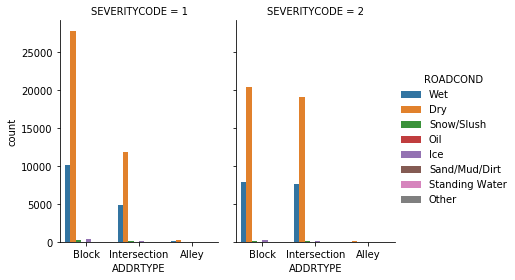

In [34]:
g = sns.catplot(x="ADDRTYPE", hue="ROADCOND", col="SEVERITYCODE",
                data=df3, kind="count",
                height=4, aspect=.7);

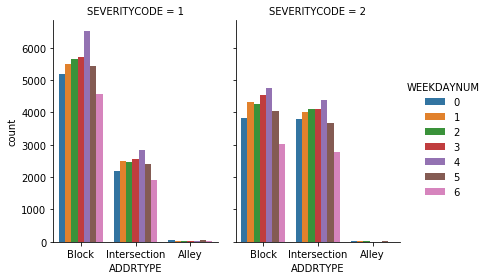

In [35]:
g = sns.catplot(x="ADDRTYPE", hue="WEEKDAYNUM", col="SEVERITYCODE",
                data=df3, kind="count",
                height=4, aspect=.7);

All features we selected need to be converted to the format that can be fed into machine learning models, we use one-hot encoding to label them - converting categorical features to numerical values.

In [36]:
df3["ADDRTYPE"] = df3["ADDRTYPE"].astype('category')

In [37]:
df3["ADDRTYPE_CAT"] = df3["ADDRTYPE"].cat.codes

In [38]:
df3["WEATHER"] = df3["WEATHER"].astype('category')

In [39]:
df3["WEATHER_CAT"] = df3["WEATHER"].cat.codes

In [40]:
df3["LIGHTCOND"] = df3["LIGHTCOND"].astype('category')

In [41]:
df3["LIGHTCOND_CAT"] = df3["LIGHTCOND"].cat.codes

In [42]:
df3["ROADCOND"] = df3["ROADCOND"].astype('category')

In [43]:
df3["ROADCOND_CAT"] = df3["ROADCOND"].cat.codes

In [44]:
df3["WEEKDAYNUM"] = df3["WEEKDAYNUM"].astype('category')

In [45]:
df3["WEEKDAYNUM_CAT"] = df3["WEEKDAYNUM"].cat.codes

In [46]:
df4 = df3.drop(columns = ['ADDRTYPE', 'INCDATE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'WEEKDAYNUM'])

In [47]:
df4.head()

,SEVERITYCODE,ADDRTYPE_CAT,WEATHER_CAT,LIGHTCOND_CAT,ROADCOND_CAT,WEEKDAYNUM_CAT
0,1,1,6,5,7,3
1,1,1,1,5,0,3
2,1,1,1,5,0,0
3,1,1,1,5,0,4
4,1,1,1,5,0,0


In [48]:
df4.dtypes

SEVERITYCODE      int64
ADDRTYPE_CAT       int8
WEATHER_CAT        int8
LIGHTCOND_CAT      int8
ROADCOND_CAT       int8
WEEKDAYNUM_CAT     int8
dtype: object

In [49]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111414 entries, 0 to 111413
Data columns (total 6 columns):
SEVERITYCODE      111414 non-null int64
ADDRTYPE_CAT      111414 non-null int8
WEATHER_CAT       111414 non-null int8
LIGHTCOND_CAT     111414 non-null int8
ROADCOND_CAT      111414 non-null int8
WEEKDAYNUM_CAT    111414 non-null int8
dtypes: int64(1), int8(5)
memory usage: 1.4 MB


Let's define our feature set, X.

In [50]:
Feature = df4[['ADDRTYPE_CAT','WEATHER_CAT','LIGHTCOND_CAT','ROADCOND_CAT','WEEKDAYNUM_CAT']]
Feature.head()
X = Feature
X[0:5]

,ADDRTYPE_CAT,WEATHER_CAT,LIGHTCOND_CAT,ROADCOND_CAT,WEEKDAYNUM_CAT
0,1,6,5,7,3
1,1,1,5,0,3
2,1,1,5,0,0
3,1,1,5,0,4
4,1,1,5,0,0


And then our labels.

In [51]:
Y = df4['SEVERITYCODE'].values
Y[0:5]

array([1, 1, 1, 1, 1])

Let's normalize our data.

In [52]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int8 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[-0.78936715,  1.67946553,  0.59533255,  1.61357969,  0.03627387],
       [-0.78936715, -0.71057727,  0.59533255, -0.62623701,  0.03627387],
       [-0.78936715, -0.71057727,  0.59533255, -0.62623701, -1.52976195],
       [-0.78936715, -0.71057727,  0.59533255, -0.62623701,  0.5582858 ],
       [-0.78936715, -0.71057727,  0.59533255, -0.62623701, -1.52976195]])

Let's split our date, 20% for test data, the rest for training data.

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (89131, 5) (89131,)
Test set: (22283, 5) (22283,)


We will use K-Nearest Neighbor, Support Vector Machine, Decision Tree and Logistic Regression for our machine learnings to predict the severity.

# KNN

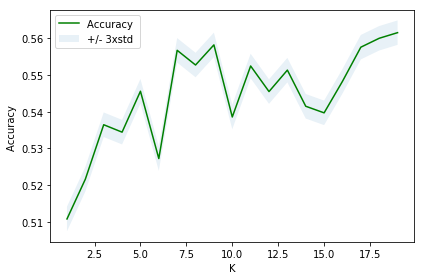

The best accuracy was with 0.5615042857783961 with k= 19


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)  
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('K')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [55]:
model_KNN = KNeighborsClassifier(n_neighbors=19)
model_KNN.fit(X_train,Y_train)
model_KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model_DecisionTree.fit(X_train,Y_train)
model_DecisionTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## SVN

In [57]:
from sklearn import svm
model_SVM = svm.SVC()
model_SVM.fit(X_train, Y_train)
model_SVM

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(C=0.01,solver='liblinear')
model_LR.fit(X_train,Y_train)
model_LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Model Evaluation using Test set

In [59]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [60]:
yhat_knn = model_KNN.predict(X_test)
jaccard_knn = jaccard_similarity_score(Y_test, yhat_knn)
f1_score_knn = f1_score(Y_test, yhat_knn, average='weighted')

In [61]:
yhat_dt = model_DecisionTree.predict(X_test)
jaccard_dt = jaccard_similarity_score(Y_test, yhat_dt)
f1_score_dt = f1_score(Y_test, yhat_dt, average='weighted')

In [62]:
yhat_svm = model_SVM.predict(X_test)
jaccard_svm = jaccard_similarity_score(Y_test, yhat_svm)
f1_score_svm = f1_score(Y_test, yhat_svm, average='weighted')

In [63]:
yhat_lg = model_LR.predict(X_test)
yhat_lg_prob = model_LR.predict_proba(X_test)
jaccard_lg = jaccard_similarity_score(Y_test, yhat_lg)
f1_score_lg = f1_score(Y_test, yhat_lg, average='weighted')
logloss_lg = log_loss(Y_test, yhat_lg_prob)

## Result

We have plotted the results of our model evaluation using the test data.  

Using the F1-score of our algorithms, SVM gave the highest result, though not that significant difference from the other F1-scores.

The accuracy of the Logistic Regression is based on the Logistic Loss of 0.675.

The result is not as good as we expected because the accuracy of the models is not very high. 


In [64]:
report = pd.DataFrame(data=np.array([["KNN", round(jaccard_knn,4), round(f1_score_knn,4), "NA"],
                                     ["Decision Tree", round(jaccard_dt,4), round(f1_score_dt,4), "NA"],
                                    ["SVM", round(jaccard_svm,4), round(f1_score_svm,4), "NA"],
                                    ["LogisticRegression", round(jaccard_lg,4), round(f1_score_lg,4), round(logloss_lg,4)]]), 
                      columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report = report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report

,,,
Algorithm,Jaccard,F1-score,LogLoss
KNN,0.5615,0.5605,NA
Decision Tree,0.5896,0.5844,NA
SVM,0.5898,0.5847,NA
LogisticRegression,0.5896,0.5845,0.675


## Discussion

Having selected the collision address type, weather condition, road condition, light condition, date of the incident as our independent variables to predict the severity of a collision gave us valuable insight on how most of the collisions occur on the following conditions, though non-inclusive:

o Clear Weather

o Dry Road

o Daylight

Analysing the time of the incident would tell us that there is less collisions during weekend and surprisingly, there is an upward trend on collisions on weekdays.

Looking at the address/location of the collision, there are more Severity Code 1 collisions along Blocks than on Intersections. Collisions of Severity Code 2 registered almost the same count on both Blocks and Intersections.

With these observations, we cannot overemphasize the importance of safety and vigilance even at the most ideal driving situations, encouraging all the more local governments in ensuring protection and order on roads are in place.


## Conclusion

We were able to show how accident can be predicted by using collected and available data on collision. Although our analysis has given us some good insights, the accuracy of our models are not that optimum.  Perhaps this can be improved by considering other features for analysis.